In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [4]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]

array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

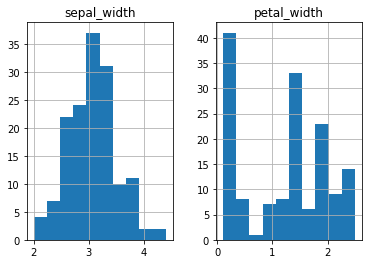

In [5]:
X.hist()

In [6]:
# Scale the X

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head
X_scaled.head()

,sepal_width,petal_width
1,0.625000,0.041667
2,0.416667,0.041667
3,0.500000,0.041667
4,0.458333,0.041667
5,0.666667,0.041667


In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
iris['cluster']=kmeans.predict(X_scaled)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
# lets look at sample of 20 randomly selected rows in iris dataset

iris.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
46,4.8,3.0,1.4,0.3,setosa,0
76,6.6,3.0,4.4,1.4,versicolor,1
137,6.3,3.4,5.6,2.4,virginica,2
52,6.4,3.2,4.5,1.5,versicolor,1
56,5.7,2.8,4.5,1.3,versicolor,1
143,5.8,2.7,5.1,1.9,virginica,2
145,6.7,3.3,5.7,2.5,virginica,2
50,5.0,3.3,1.4,0.2,setosa,0
67,5.6,3.0,4.5,1.5,versicolor,1
75,6.4,2.9,4.3,1.3,versicolor,1


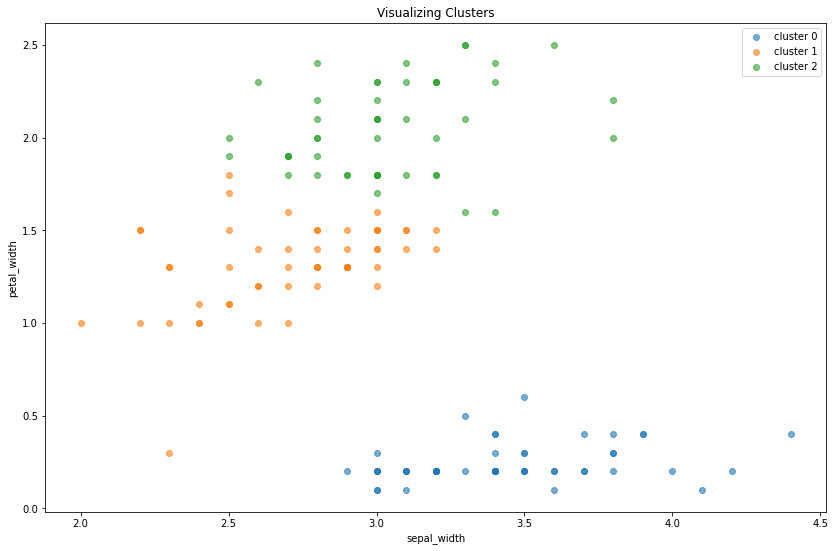

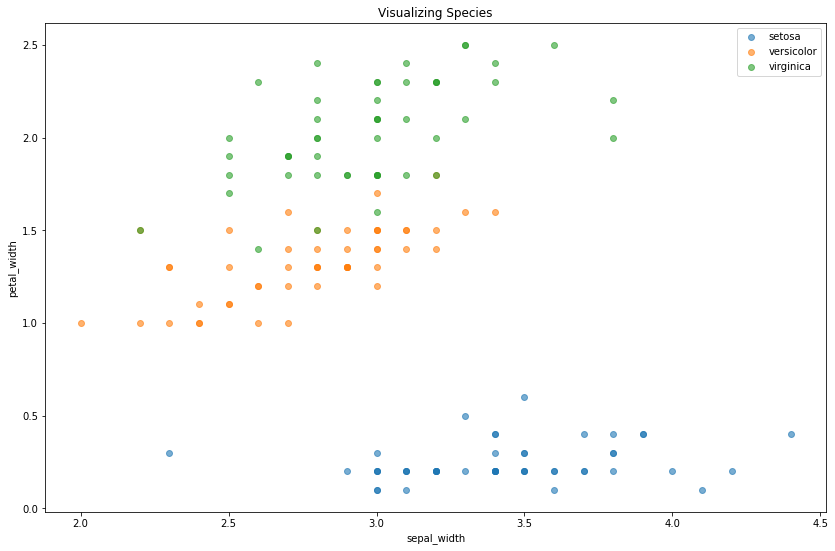

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Species')
plt.show()

In [13]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.60459184, 0.06037415],
       [0.29481132, 0.50393082],
       [0.43402778, 0.81336806]])

In [14]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.604592,0.060374
1,0.294811,0.503931
2,0.434028,0.813368


In [15]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.707547,1.309434
2,3.041667,2.052083


In [17]:
# Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[3.45102041, 0.24489796],
       [2.70754717, 1.30943396],
       [3.04166667, 2.05208333]])